# QS World Ranked Universities in Medicine (2018-2022) - EDA

TODO - This dataset contains data of world ranked universities in Medicine from 2018 to 2022 and it is taken from kaggle. In this project, the world ranked universities are analyzed by conducting exploratory data analysis and visualizing it. This project is part of the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com).

## Downloading the Dataset

#### The dataset is downloaded from kaggle using the library opendatasets. 

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/aklimarimi/qs-world-ranked-universities-20182022?select=data1.csv' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bhargavchebolu
Your Kaggle Key: ········


100%|██████████| 51.4k/51.4k [00:00<00:00, 25.9MB/s]

The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './qs-world-ranked-universities-20182022'

In [5]:
import os
os.listdir(data_dir)

['data1.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "qs-world-ranked-universities(2018-2022)-analysis" 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "bhargavchebolu/qs-world-ranked-universities-2018-2022-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/bhargavchebolu/qs-world-ranked-universities-2018-2022-analysis


'https://jovian.com/bhargavchebolu/qs-world-ranked-universities-2018-2022-analysis'

## Data Preparation and Cleaning

#### In this part the data is prepared and cleaned for analyzing and visualizing. The data is checked for null values and are removed.  


In [12]:
import pandas as pd

In [13]:
df = pd.read_csv(data_dir + "/data1.csv")

In [14]:
df

,Year,Rank,Name,Point,City,Country
0,2018,1,Harvard University,97.7,Cambridge,United States
1,2018,2,University of Cambridge,94.6,Cambridge,United Kingdom
2,2018,2,University of Oxford,94.6,Oxford,United Kingdom
3,2018,4,Massachusetts Institute of Technology (MIT),92.5,Cambridge,United States
4,2018,5,Johns Hopkins University,92.1,Baltimore,United States
...,...,...,...,...,...,...
5245,2022,346,National Cheng Kung University (NCKU),60.7,Tainan City,Taiwan
5246,2022,346,University of New Mexico,60.7,Albuquerque,United States
5247,2022,348,Universitas Indonesia,60.6,Depok,Indonesia
5248,2022,349,Aga Khan University,60.5,Karachi,Pakistan


In [15]:
# Checking for null values
df.isnull().sum()

Year         0
Rank         0
Name         0
Point      220
City         0
Country      1
dtype: int64

In [16]:
# Null values of Point column are replaced with mean values
df["Point"] = pd.to_numeric(df["Point"])
df["Point"].fillna(df["Point"].mean(),inplace=True)

In [17]:
df.isnull().sum()

Year       0
Rank       0
Name       0
Point      0
City       0
Country    1
dtype: int64

In [18]:
# Null value in Country column is replaced by the country name by searching for it using university name.
df["Country"].fillna("France",inplace=True)

In [19]:
df

,Year,Rank,Name,Point,City,Country
0,2018,1,Harvard University,97.7,Cambridge,United States
1,2018,2,University of Cambridge,94.6,Cambridge,United Kingdom
2,2018,2,University of Oxford,94.6,Oxford,United Kingdom
3,2018,4,Massachusetts Institute of Technology (MIT),92.5,Cambridge,United States
4,2018,5,Johns Hopkins University,92.1,Baltimore,United States
...,...,...,...,...,...,...
5245,2022,346,National Cheng Kung University (NCKU),60.7,Tainan City,Taiwan
5246,2022,346,University of New Mexico,60.7,Albuquerque,United States
5247,2022,348,Universitas Indonesia,60.6,Depok,Indonesia
5248,2022,349,Aga Khan University,60.5,Karachi,Pakistan


In [20]:
df.isnull().sum()

Year       0
Rank       0
Name       0
Point      0
City       0
Country    0
dtype: int64

In [21]:
# Replacing '-' in City column with name Unknown to not get any issues
df['City'].replace('-', 'Unknown', inplace=True)

In [22]:
# This step removes any whitespaces in the column
df.Country.str.strip()

0        United States
1       United Kingdom
2       United Kingdom
3        United States
4        United States
             ...      
5245            Taiwan
5246     United States
5247         Indonesia
5248          Pakistan
5249     United States
Name: Country, Length: 5250, dtype: object

In [23]:
# This step removes any whitespaces in the column
df.City.str.strip()

0         Cambridge
1         Cambridge
2            Oxford
3         Cambridge
4         Baltimore
           ...     
5245    Tainan City
5246    Albuquerque
5247          Depok
5248        Karachi
5249         Boston
Name: City, Length: 5250, dtype: object

In [24]:
import jovian

In [25]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "bhargavchebolu/qs-world-ranked-universities-2018-2022-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/bhargavchebolu/qs-world-ranked-universities-2018-2022-analysis


'https://jovian.com/bhargavchebolu/qs-world-ranked-universities-2018-2022-analysis'

## Exploratory Analysis and Visualization

#### Performing exploratory analysis on the dataset to get basic understanding of the available data. 



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [26]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Exploring number of universities per year

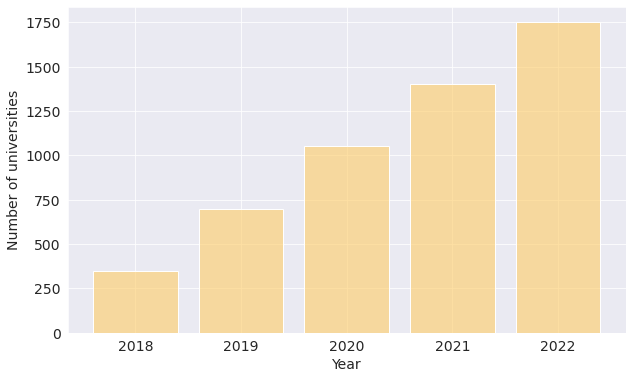

In [27]:
years = range(2018,2023)
counts = df.groupby(df.Year)['Name'].count()
plt.bar(years,counts,color=(1.0, 0.8, 0.4, 0.6))
plt.xlabel('Year')
plt.ylabel('Number of universities');

From the above figure, it is clear that data is being added on top of previous year data. So, for every year it is getting increased such as 350 for 2018, 700 for 2019 and so on. Therefore, we will take 2022 data and will divide it for the years from 2018 to 2022.

In [28]:
# Taking 2022 data as it consists of data from 2018 to 2022
new_df = df[df['Year'] == 2022]

In [29]:
# The data from 2022 is assigned to each year
new_df.loc[3500:3849, :]['Year'] = 2018 # First 350 rows for the year 2018
new_df.loc[3849:4199, :]['Year'] = 2019 # Next 350 rows for the year 2019
new_df.loc[4199:4549, :]['Year'] = 2020 # Next 350 rows for the year 2020
new_df.loc[4549:4899, :]['Year'] = 2021 # Next 350 rows for the year 2021
new_df.loc[4899:5249, :]['Year'] = 2022 # Next 350 rows for the year 2022

In [30]:
new_df

,Year,Rank,Name,Point,City,Country
3500,2018,1,Harvard University,97.7,Cambridge,United States
3501,2018,2,University of Cambridge,94.6,Cambridge,United Kingdom
3502,2018,2,University of Oxford,94.6,Oxford,United Kingdom
3503,2018,4,Massachusetts Institute of Technology (MIT),92.5,Cambridge,United States
3504,2018,5,Johns Hopkins University,92.1,Baltimore,United States
...,...,...,...,...,...,...
5245,2022,346,National Cheng Kung University (NCKU),60.7,Tainan City,Taiwan
5246,2022,346,University of New Mexico,60.7,Albuquerque,United States
5247,2022,348,Universitas Indonesia,60.6,Depok,Indonesia
5248,2022,349,Aga Khan University,60.5,Karachi,Pakistan


In [31]:
# The updated dataset is again converted back to csv for any further analysis 
new_df.to_csv('results.csv', index=None)

#### Exploring number of universities per country

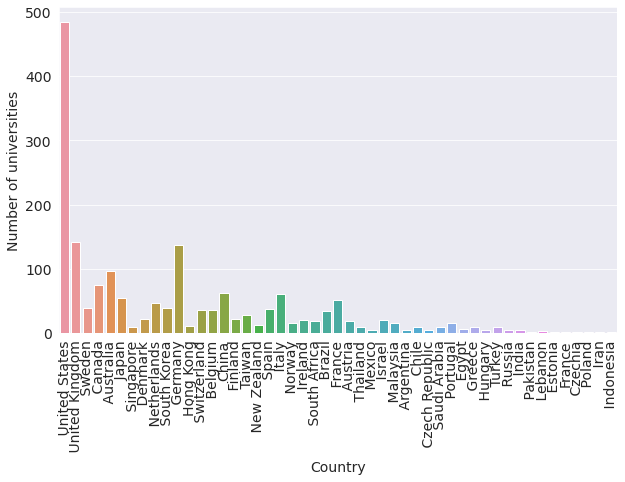

In [32]:
sns.countplot(data=new_df,x='Country') # Countplot counts the assigned value in the dataframe
plt.ylabel('Number of universities')
plt.xticks(rotation=90) # This step makes the names to rotate by 90 degrees
plt.show()

From this graph, the united states has more number of universities compared to other countries.

#### University rankings in Germany from 2018 to 2022

In [33]:
# Strpping off any whitespaces in the Country column for Germany
germany_df = new_df[new_df.Country.str.strip() == 'Germany']
germany_df

,Year,Rank,Name,Point,City,Country
3539,2018,40,Ruprecht-Karls-Universität Heidelberg,79.7,Heidelberg,Germany
3542,2018,43,Ludwig-Maximilians-Universität München,79.5,Munich,Germany
3584,2018,85,Technical University of Munich,75.0,Munich,Germany
3597,2018,98,Albert-Ludwigs-Universitaet Freiburg,73.8,Freiburg im Breisgau,Germany
3611,2018,112,Goethe-University Frankfurt am Main,72.6,Frankfurt,Germany
...,...,...,...,...,...,...
5201,2022,300,Universität Duisburg-Essen,63.1,Duisburg,Germany
5217,2022,316,Universität Jena,62.3,Jena,Germany
5232,2022,333,Ulm University,61.4,Ulm,Germany
5240,2022,341,Ruhr-Universität Bochum,61.1,Bochum,Germany


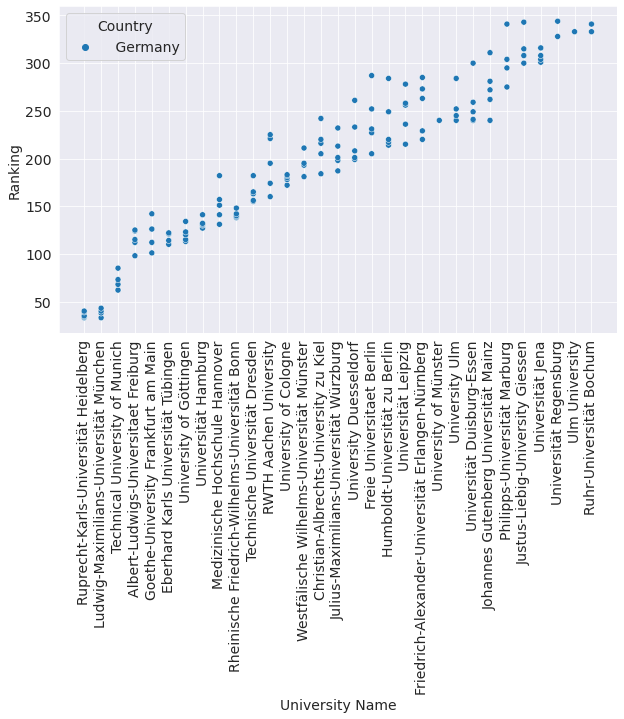

In [34]:
# Plotting the rankings of German universities
country_df = germany_df.sort_values(by='Rank')
sns.scatterplot(data=country_df,x="Name",y="Rank",hue="Country")
plt.xlabel('University Name')
plt.ylabel('Ranking')
plt.xticks(rotation=90)
plt.show()

In the above graph, the rankings of German universities are plotted. Top university in Germany is Ruprecht-Karls-Universitaet Heidelberg.

#### Distribution of countries with a range of Points

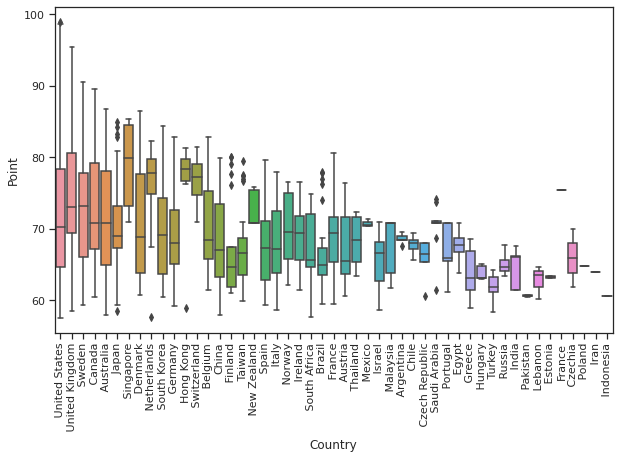

In [35]:
# Point distribution in all countries
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="Country", y="Point",data=new_df)
plt.xticks(rotation=90)
plt.show()
#top30_us = us_df.head(30)
#plt.plot(top30_us.City,top30_us.Rank)


Singapore has more average point than remaining countries.

#### Number of universities in Germany by year


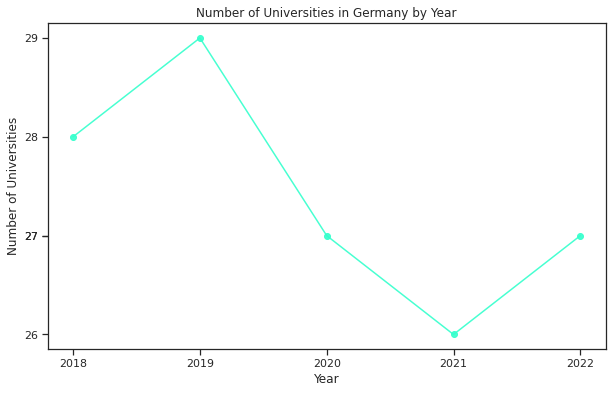

In [55]:
num_of_unis = germany_df.groupby('Year').size().reset_index(name='Name')
plt.plot(num_of_unis['Year'], num_of_unis['Name'],marker='o',color=(0.2, 1.0, 0.8, 0.9))
plt.xticks(num_of_unis['Year'])
plt.xlabel('Year')
plt.yticks(num_of_unis['Name'])
plt.ylabel('Number of Universities')
plt.title('Number of Universities in Germany by Year')
plt.show()

Number of universities are more in 2019 and less in 2021.

Let us save and upload our work to Jovian before continuing

In [56]:
import jovian

In [57]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "bhargavchebolu/qs-world-ranked-universities-2018-2022-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/bhargavchebolu/qs-world-ranked-universities-2018-2022-analysis


'https://jovian.com/bhargavchebolu/qs-world-ranked-universities-2018-2022-analysis'

## Asking and Answering Questions

TODO - Some questions are answered by visualizations and got interesting insights.



   #### Q1: What are the top 10 universities?

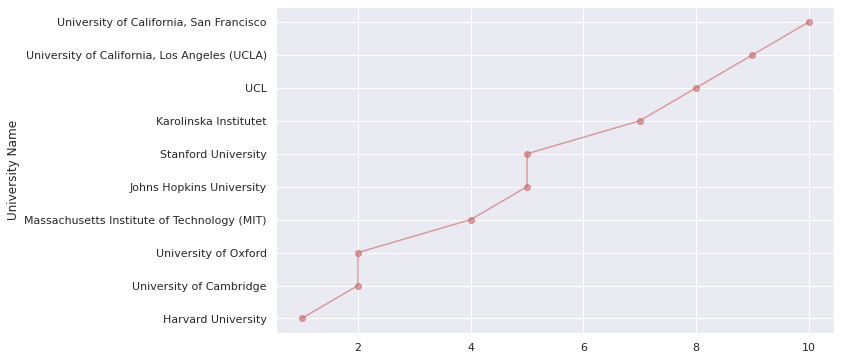

In [58]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
top_10 = new_df.head(10)
plt.plot(top_10.Rank,top_10.Name,color=(0.8, 0.4, 0.4, 0.6),marker='o')
plt.ylabel('University Name')
plt.show()

Harvard university is the top ranked university.

#### Q2: What are the least 10 ranked universities?

Text(0, 0.5, 'University Name')

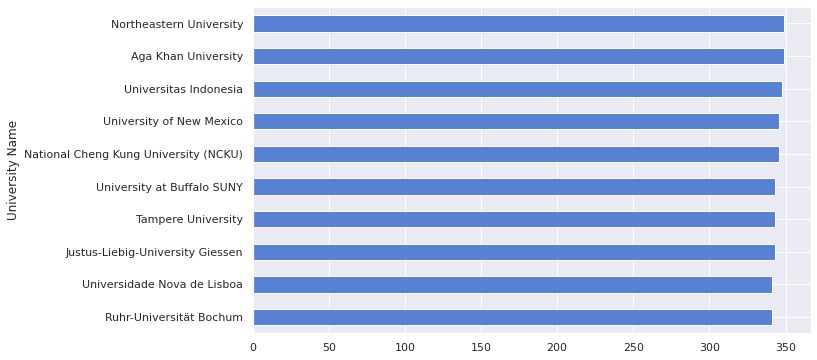

In [59]:
least_10 = new_df.tail(10)
least_10.plot(kind='barh',x='Name',y='Rank',legend=False,color=(0.2, 0.4, 0.8, 0.8))
plt.ylabel('University Name')

Northeastern university is the least ranked university.

#### Q3: What are the cities and universities with point greater than 90?

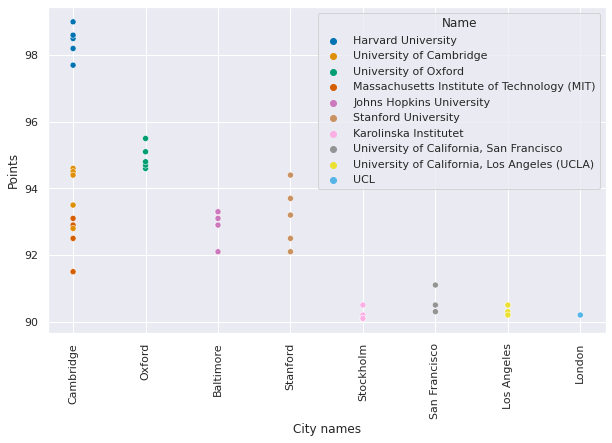

In [60]:
scores_90 = new_df[(new_df['Point'] > 90)]
sns.scatterplot(x='City', y='Point', data=scores_90,hue=scores_90.Name,palette='colorblind')
plt.xlabel('City names')
plt.ylabel('Points')
plt.xticks(rotation=90)
plt.show()

Cambridge city has more universities with point greater than 90.

#### Q4: What are the countries with top 5 ranked universities?


<AxesSubplot:ylabel='Country'>

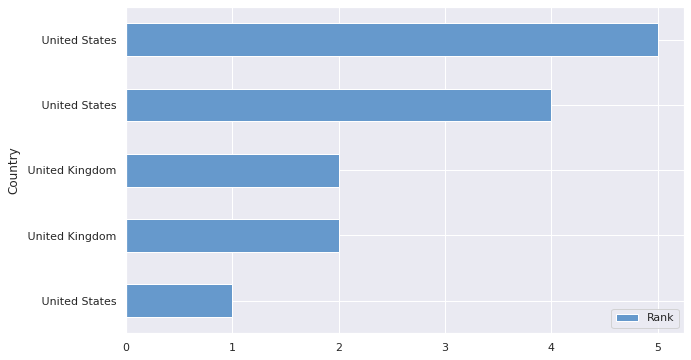

In [61]:
top_5 = new_df.head(5)
top_5.plot(kind='barh',x='Country',y='Rank',color=(0.4, 0.6, 0.8, 1.0))

United States has more top ranked universities.

#### Q5: What are the universities with point lesser than 60?

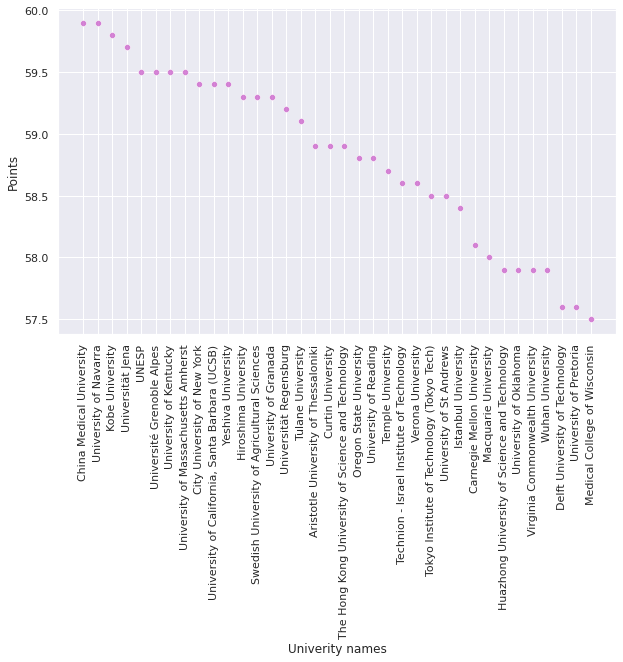

In [62]:
low_scores = new_df[(new_df['Point'] < 60)]
sns.scatterplot(x='Name', y='Point', data=low_scores,color=(0.8, 0.4, 0.8, 0.8))
plt.xlabel('Univerity names')
plt.ylabel('Points')
plt.xticks(rotation=90)
plt.show()

Medical college of Wisconsin has least point than remaining universities.

Let us save and upload our work to Jovian before continuing.

In [63]:
import jovian

In [64]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "bhargavchebolu/qs-world-ranked-universities-2018-2022-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/bhargavchebolu/qs-world-ranked-universities-2018-2022-analysis


'https://jovian.com/bhargavchebolu/qs-world-ranked-universities-2018-2022-analysis'

## Inferences and Conclusion

#### The top universities with a score greater than 90 are in United States and United Kingdom. Harvard University is the number 1 university in the world to study Medicine. 

In [65]:
import jovian

In [66]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "bhargavchebolu/qs-world-ranked-universities-2018-2022-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/bhargavchebolu/qs-world-ranked-universities-2018-2022-analysis


'https://jovian.com/bhargavchebolu/qs-world-ranked-universities-2018-2022-analysis'

## References and Future Work

In future work, with extra information in the dataset, we can gather more insights such as rankings of the universities in different years etc. 

Useful links: https://seaborn.pydata.org/api.html, 
              https://matplotlib.org/stable/gallery/index.html

In [69]:
import jovian

In [70]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "bhargavchebolu/qs-world-ranked-universities-2018-2022-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/bhargavchebolu/qs-world-ranked-universities-2018-2022-analysis


'https://jovian.com/bhargavchebolu/qs-world-ranked-universities-2018-2022-analysis'